In [73]:
import pandas as pd 
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

sns.set_theme()

In [74]:

from statsmodels.tools.sm_exceptions import  ValueWarning
import warnings

warnings.simplefilter(action = 'ignore', category = ValueWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
df = pd.read_csv('prepared_data.csv',parse_dates=['Date'])

In [76]:
df_coffee = df.loc[df['Product']=='Coffee',['Date','Quantity']].reset_index(drop=True)

In [77]:
split_date = '2023-05-31'

df_train = df_coffee[df_coffee['Date']<= split_date]
df_test = df_coffee[df_coffee['Date'] > split_date]

In [78]:
results_aic = pm.auto_arima(df_train['Quantity'], trace=True, information_criterion='aic',seasonal=True,start_p=0,max_p=10, start_q=0,max_q=10,stepwise=False)
results_aic = pm.auto_arima(df_train['Quantity'], trace=True, information_criterion='bic',seasonal=True,start_p=0,max_p=10, start_q=0,max_q=10,stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1636.360, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1603.113, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1594.234, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1596.140, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1597.376, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1598.851, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1622.483, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1594.351, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1596.082, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1612.698, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1596.107, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=1597.953, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[1] i

In [79]:
model = ARIMA(df_train['Quantity'], order = (0,1,2)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  151
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -796.083
Date:                Wed, 12 Nov 2025   AIC                           1598.166
Time:                        22:44:54   BIC                           1607.198
Sample:                             0   HQIC                          1601.835
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5207      0.095     -5.507      0.000      -0.706      -0.335
ma.L2         -0.2196      0.083     -2.658      0.008      -0.382      -0.058
sigma2      2373.3352    234.898     10.104      0.0

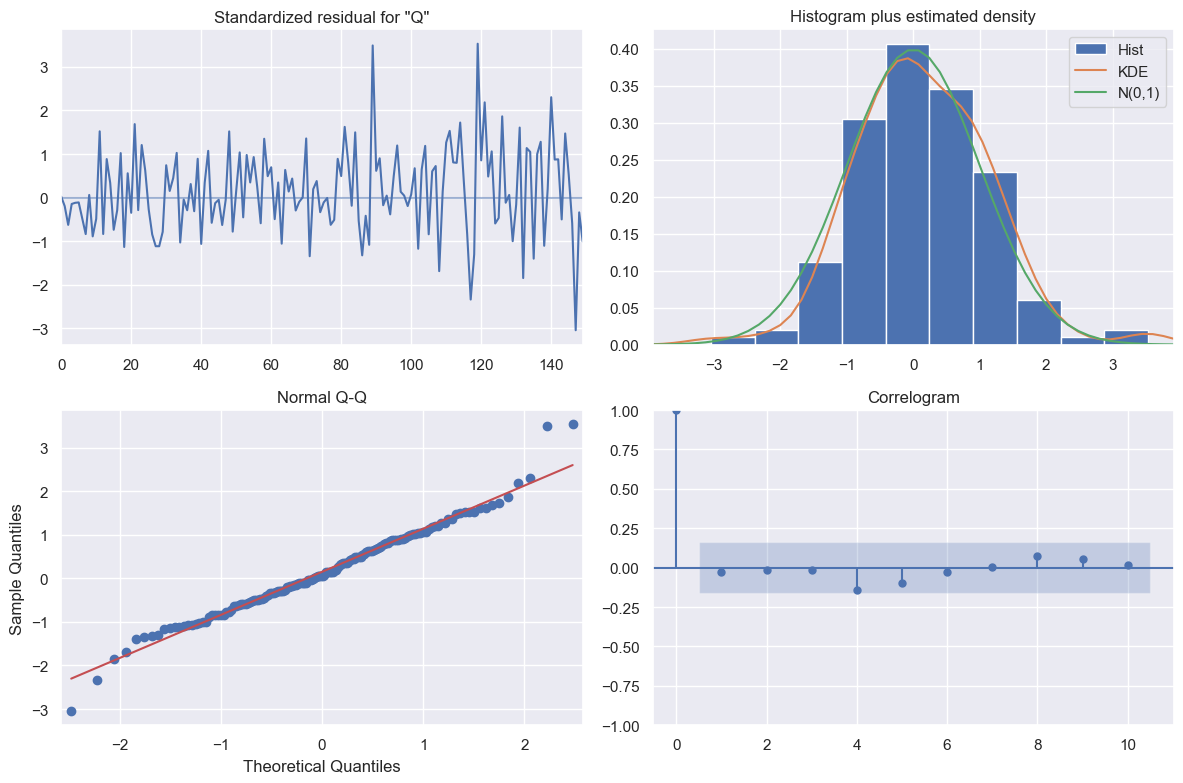

In [80]:
model.plot_diagnostics(figsize = (12,8))
plt.tight_layout()
plt.savefig('Images/Diagnostics/ARMIA_Coffee.png')
plt.show()

In [81]:
forecast = model.forecast(steps=len(df_test))
forecast.index = df_test['Date']

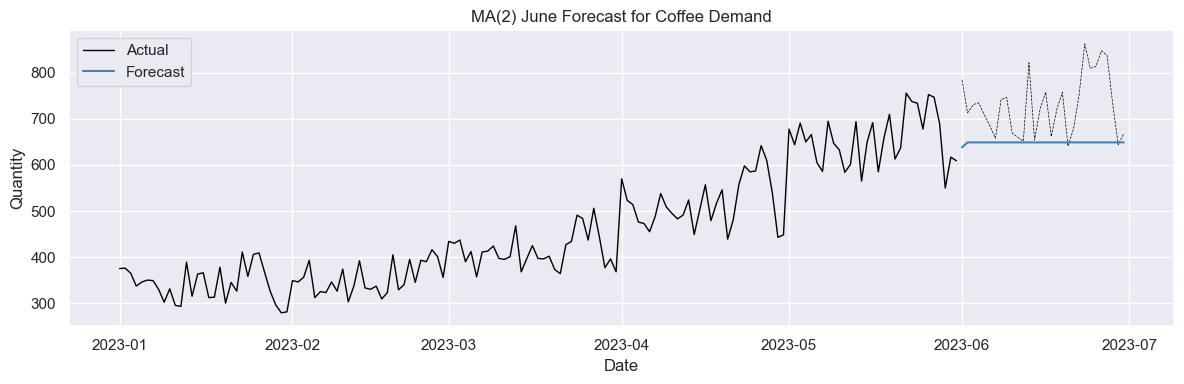

In [82]:
plt.figure(figsize=(12,4))


ax = sns.lineplot(data = df_train,x='Date',y='Quantity', label = "Actual",c='black', linewidth = 1)
ax = sns.lineplot(data = df_test,x='Date',y='Quantity', linestyle = '--', c='black', linewidth = 0.5)
ax = sns.lineplot(x=forecast.index, y=forecast, c='steelblue', label='Forecast')
ax.set(title = 'MA(2) June Forecast for Coffee Demand')

plt.tight_layout()
plt.savefig('Images/Forecasts/Coffee_ARIMA.png')

plt.show()

In [83]:
mape = mean_absolute_percentage_error(df_test['Quantity'], forecast) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 10.49%
